### Task 4
How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

***What's Happening***
- An increase in Taxi Time that varies with the hour of the day indicates that taxi supply cannot meet taxi demand. There are different scenarios that could cause this:
    - if you have less staff on at night (thus less taxis available) and demand remains at a similar level regardless of time then we would have a case of *supply < demand*
    - if you have increased demand at certain times which surpasses the number of taxis available at the airport then we would have a case of *demand > supply*

***Strategy***
- bin the flights by hour of the day they depart (both scheduled and actual)
- determine if the flight frequency is consistent across the day
- determine the mean and median taxi time throughout the day
- repeat for arrival times with taxi in


---

**INPUT**: data with nulls removed

---

In [256]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [219]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("flight_sample_small.csv")

In [229]:
df = pd.read_csv("flight_sample_large.csv")

In [94]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [228]:
def check_time_block(time):
    """Determine the hour of the day
    INPUT time HHMM
    RETURNS hour 0-23 where 0 == 12am and 23 == 11pm"""
    if type(time) == 'numpy.ndarray':
        time = time.astype(int)
    time = int(time)
    
    t = time // 100
    if t == 0:
        return 0
    return t-1

--- 
Check if Constant Demand Over Hours

*Taxi In*

In [230]:
check = df[df.cancelled == 0]
check = df[["arr_time", "arr_delay"]]
check["fl_hour"] = check.arr_time.map(check_time_block)
check = check.groupby("fl_hour", as_index=False)["arr_delay"].count()

Text(0.5, 1.0, 'Taxi In Demand by Hour')

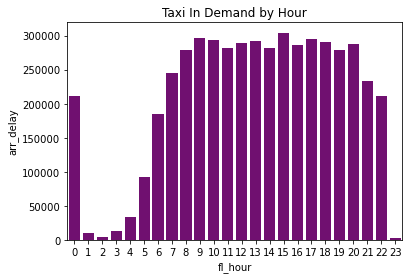

In [231]:
sns.barplot(x="fl_hour", 
            y="arr_delay", 
            data=check , 
            color='purple').set_title("Taxi In Demand by Hour")

*Taxi Out*

In [232]:
check = df[df.cancelled == 0]
check = df[["dep_time", "dep_delay"]]
check["fl_hour"] = check.dep_time.map(check_time_block)
check = check.groupby("fl_hour", as_index=False)["dep_delay"].count()

Text(0.5, 1.0, 'Taxi Out Demand by Hour')

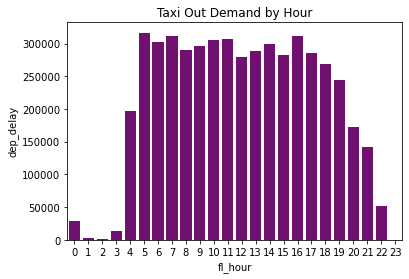

In [233]:
sns.barplot(x="fl_hour", 
            y="dep_delay", 
            data=check , 
            color='purple').set_title("Taxi Out Demand by Hour")

---

In [254]:
#break into arr and dep
taskfour_arr = df[df["cancelled"]==0]
taskfour_arr = taskfour_arr[['crs_arr_time', 'arr_time','taxi_in','distance']]
taskfour_dep = df[['crs_dep_time', 'dep_time', 'taxi_out','distance']]

In [235]:
#get the scheduled arrival hour
taskfour_arr["crs_arr_time"] = taskfour_arr["crs_arr_time"].apply(check_time_block)

In [236]:
#get the actual arrival hour
taskfour_arr["arr_time"] = taskfour_arr["arr_time"].apply(check_time_block)

In [237]:
#use groupby to get the mean of the taxi in time for both scheduled and actual
taskfour_arr_crs_g = taskfour_arr.groupby("crs_arr_time", as_index=False)["taxi_in"].mean()
taskfour_arr_crs_g.rename(columns = {'taxi_in': 'mean_taxi_in'}, inplace=True)
taskfour_arr_g = taskfour_arr.groupby("arr_time", as_index=False)["taxi_in"].mean()
taskfour_arr_g.rename(columns = {'taxi_in': 'mean_taxi_in'}, inplace=True)

In [238]:
#repeat for median
taskfour_arr_crs = taskfour_arr.groupby("crs_arr_time", as_index=False)["taxi_in"].median()
taskfour_arr_crs.rename(columns = {'taxi_in': 'med_taxi_in'}, inplace=True)
taskfour_arr = taskfour_arr.groupby("arr_time", as_index=False)["taxi_in"].median()
taskfour_arr.rename(columns = {'taxi_in': 'med_taxi_in'}, inplace=True)

In [239]:
#merge into one dataframe
taskfour_arr = taskfour_arr.merge(taskfour_arr_g, how='outer', on = "arr_time")
taskfour_arr_crs = taskfour_arr_crs.merge(taskfour_arr_crs_g, how='outer', on = 'crs_arr_time')

Text(0.5, 1.0, 'Mean Taxi In Time by CRS Arrival Time')

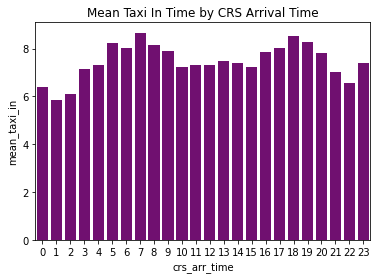

In [240]:
#Plot Mean Taxi Time based on CRS Arrival Time
sns.barplot(x="crs_arr_time", 
            y="mean_taxi_in", 
            data=taskfour_arr_crs , 
            color='purple').set_title("Mean Taxi In Time by CRS Arrival Time")

Text(0.5, 1.0, 'Median Taxi In Time by CRS Arrival Time')

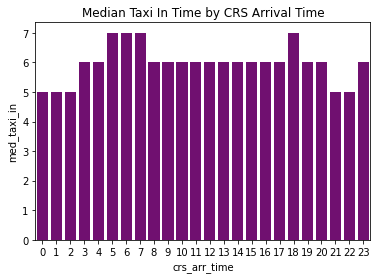

In [241]:
#Plot Median Taxi Time based on CRS Arrival Time
sns.barplot(x="crs_arr_time", 
            y="med_taxi_in", 
            data=taskfour_arr_crs , 
            color='purple').set_title("Median Taxi In Time by CRS Arrival Time")

Text(0.5, 1.0, 'Mean Taxi In Time by Arrival Time')

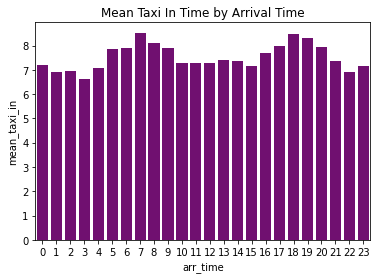

In [242]:
#Plot Mean Taxi Time based on Actual Arrival Time
sns.barplot(x="arr_time", 
            y="mean_taxi_in", 
            data=taskfour_arr , 
            color='purple').set_title("Mean Taxi In Time by Arrival Time")

Text(0.5, 1.0, 'Median Taxi In Time by Arrival Time')

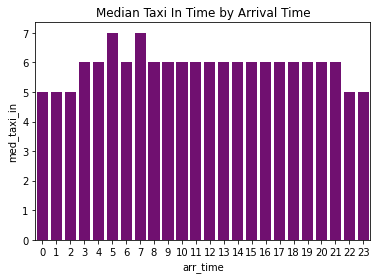

In [243]:
#Plot Median Taxi Time based on Actual Arrival Time
sns.barplot(x="arr_time",
            y="med_taxi_in",
            data=taskfour_arr , 
            color='purple').set_title("Median Taxi In Time by Arrival Time")

In [244]:
#get the hour of crs dep time
taskfour_dep["crs_dep_time"] = taskfour_dep["crs_dep_time"].apply(check_time_block)

In [245]:
#get the hour of actual departure time
taskfour_dep["dep_time"] = taskfour_dep["dep_time"].apply(check_time_block)

In [246]:
#use groupby to get the mean of the taxi out time for both scheduled and actual
taskfour_dep_crs_g = taskfour_dep.groupby("crs_dep_time", as_index=False)["taxi_out"].mean()
taskfour_dep_crs_g.rename(columns = {'taxi_out': 'mean_taxi_out'}, inplace=True)
taskfour_dep_g = taskfour_dep.groupby("dep_time", as_index=False)["taxi_out"].mean()
taskfour_dep_g.rename(columns = {'taxi_out': 'mean_taxi_out'}, inplace=True)

In [247]:
#repeat for median
taskfour_dep_crs = taskfour_dep.groupby("crs_dep_time", as_index=False)["taxi_out"].median()
taskfour_dep_crs.rename(columns = {'taxi_out': 'med_taxi_out'}, inplace=True)
taskfour_dep = taskfour_dep.groupby("dep_time", as_index=False)["taxi_out"].median()
taskfour_dep.rename(columns = {'taxi_out': 'med_taxi_out'}, inplace=True)

In [248]:
#merge
taskfour_dep = taskfour_dep.merge(taskfour_dep_g, how='outer', on = "dep_time")
taskfour_dep_crs = taskfour_dep_crs.merge(taskfour_dep_crs_g, how='outer', on = 'crs_dep_time')

Text(0.5, 1.0, 'Mean Taxi Out Time by CRS Departure Time')

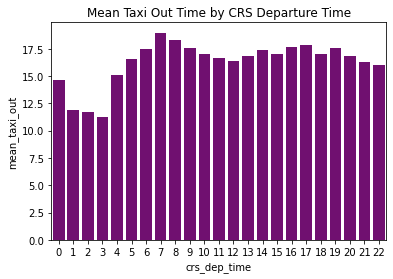

In [249]:
#plot mean taxi out time by CRS Departure Time
sns.barplot(x="crs_dep_time",
            y="mean_taxi_out",
            data=taskfour_dep_crs ,
            color='purple').set_title("Mean Taxi Out Time by CRS Departure Time")

Text(0.5, 1.0, 'Median Taxi Out Time by CRS Departure Time')

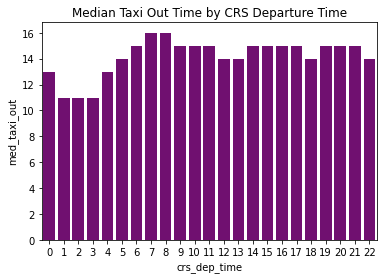

In [250]:
#plot median taxi out time by CRS Departure Time
sns.barplot(x="crs_dep_time", 
            y="med_taxi_out", 
            data=taskfour_dep_crs , 
            color='purple').set_title("Median Taxi Out Time by CRS Departure Time")

Text(0.5, 1.0, 'Mean Taxi Out Time by Departure Time')

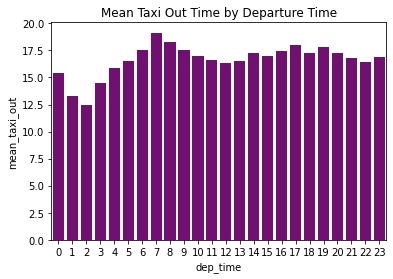

In [251]:
#plot mean taxi out time by Actual Departure Time
sns.barplot(x="dep_time", 
            y="mean_taxi_out", 
            data=taskfour_dep , 
            color='purple').set_title("Mean Taxi Out Time by Departure Time")

Text(0.5, 1.0, 'Median Taxi Out Time by Departure Time')

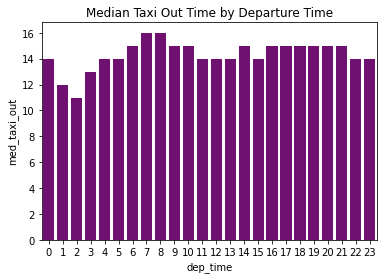

In [252]:
#plot median taxi out time by Actual Departure Time
sns.barplot(x="dep_time", 
            y="med_taxi_out", 
            data=taskfour_dep , 
            color='purple').set_title("Median Taxi Out Time by Departure Time")

Let's determine if these variances are significant 
using One-Way Anova Tests



Since we have several means we will follow a two stage process since we cannot just compare all possible pairs with t tests.
- ANOVA (analysis of variance) will tell us if all the means are equal
- If the ANOVA shows the means aren't all equal then which means are unequal and by how much?

scipy.stats.f_oneway(*args, axis=0)

    Perform one-way ANOVA.

    The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [255]:
crs_dep_0 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==0]
crs_dep_1 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==1]
crs_dep_2 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==2]
crs_dep_3 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==3]
crs_dep_4 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==4]
crs_dep_5 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==5]
crs_dep_6 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==6]
crs_dep_7 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==7]
crs_dep_8 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==8]
crs_dep_9 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==9]
crs_dep_10 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==10]
crs_dep_11 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==11]
crs_dep_12 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==12]
crs_dep_13 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==13]
crs_dep_14 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==14]
crs_dep_15 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==15]
crs_dep_16 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==16]
crs_dep_17 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==17]
crs_dep_18 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==18]
crs_dep_19 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==19]
crs_dep_20 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==20]
crs_dep_21 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==21]
crs_dep_22 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==22]
crs_dep_23 = taskfour_dep.taxi_out[taskfour_dep["crs_dep_time"]==23]

In [257]:
results_crsdep = st.f_oneway(crs_dep_0,crs_dep_1, crs_dep_2, crs_dep_3, crs_dep_4,crs_dep_5,crs_dep_6,
           crs_dep_7,crs_dep_8,crs_dep_9,crs_dep_10,crs_dep_11,crs_dep_12,crs_dep_13,
           crs_dep_14,crs_dep_15,crs_dep_16,crs_dep_17,crs_dep_18,crs_dep_19,crs_dep_20,
           crs_dep_21,crs_dep_22, crs_dep_23)

In [258]:
if results_crsdep[1] < 0.05:
    print("significant evidence")
else: 
    print("insignificant evidence")

insignificant evidence


In [194]:
dep_0 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==0]
dep_1 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==1]
dep_2 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==2]
dep_3 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==3]
dep_4 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==4]
dep_5 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==5]
dep_6 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==6]
dep_7 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==7]
dep_8 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==8]
dep_9 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==9]
dep_10 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==10]
dep_11 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==11]
dep_12 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==12]
dep_13 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==13]
dep_14 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==14]
dep_15 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==15]
dep_16 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==16]
dep_17 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==17]
dep_18 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==18]
dep_19 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==19]
dep_20 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==20]
dep_21 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==21]
dep_22 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==22]
dep_23 = taskfour_dep.taxi_out[taskfour_dep["dep_time"]==23]

In [259]:
results_dep = st.f_oneway(dep_0,dep_1,dep_2,dep_3,dep_4,dep_5,dep_6,
           dep_7,dep_8,dep_9,dep_10,dep_11,dep_12,dep_13,
           dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_20,
           dep_21,dep_22, dep_23)

In [260]:
if results_dep[1] < 0.05:
    print("significant evidence")
else: 
    print("insignificant evidence")

insignificant evidence


In [261]:
crs_arr_0 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==0]
crs_arr_1 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==1]
crs_arr_2 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==2]
crs_arr_3 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==3]
crs_arr_4 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==4]
crs_arr_5 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==5]
crs_arr_6 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==6]
crs_arr_7 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==7]
crs_arr_8 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==8]
crs_arr_9 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==9]
crs_arr_10 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==10]
crs_arr_11 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==11]
crs_arr_12 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==12]
crs_arr_13 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==13]
crs_arr_14 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==14]
crs_arr_15 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==15]
crs_arr_16 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==16]
crs_arr_17 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==17]
crs_arr_18 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==18]
crs_arr_19 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==19]
crs_arr_20 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==20]
crs_arr_21 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==21]
crs_arr_22 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==22]
crs_arr_23 = taskfour_arr.taxi_in[taskfour_arr["crs_arr_time"]==23]

In [262]:
results_crsarr = st.f_oneway(crs_arr_0,crs_arr_1,crs_arr_2,crs_arr_3,crs_arr_4,crs_arr_5,crs_arr_6,
           crs_arr_7,crs_arr_8,crs_arr_9,crs_arr_10,crs_arr_11,crs_arr_12,crs_arr_13,
           crs_arr_14,crs_arr_15,crs_arr_16,crs_arr_17,crs_arr_18,crs_arr_19,crs_arr_20,
           crs_arr_21,crs_arr_22,crs_arr_23)

In [263]:
if results_crsarr[1] < 0.05:
    print("significant evidence")
else: 
    print("insignificant evidence")

insignificant evidence


In [264]:
arr_0 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==0]
arr_1 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==1]
arr_2 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==2]
arr_3 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==3]
arr_4 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==4]
arr_5 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==5]
arr_6 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==6]
arr_7 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==7]
arr_8 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==8]
arr_9 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==9]
arr_10 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==10]
arr_11 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==11]
arr_12 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==12]
arr_13 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==13]
arr_14 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==14]
arr_15 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==15]
arr_16 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==16]
arr_17 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==17]
arr_18 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==18]
arr_19 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==19]
arr_20 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==20]
arr_21 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==21]
arr_22 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==22]
arr_23 = taskfour_arr.taxi_in[taskfour_arr["arr_time"]==23]

In [265]:
results_arr = st.f_oneway(arr_0,arr_1,arr_2,arr_3,arr_4,arr_5,arr_6,
           arr_7,arr_8,arr_9,arr_10,arr_11,arr_12,arr_13,
           arr_14,arr_15,arr_16,arr_17,arr_18,arr_19,arr_20,
           arr_21,arr_22,arr_23)

In [266]:
if results_arr[1] < 0.05:
    print("significant evidence")
else: 
    print("insignificant evidence")

insignificant evidence
